In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
sns.set_style('whitegrid')

In [33]:
test = pd.read_table('C:/Users/kosuke/dataset/revenue/test.tsv')
train = pd.read_table('C:/Users/kosuke/dataset/revenue/train.tsv',index_col=0)
test_i = test.set_index('id')

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [34]:
train['sex'] = train['sex'].map({
    'Male': 0,
    'Female': 1         
})
test_i['sex'] = test_i['sex'].map({
    'Male': 0,
    'Female': 1         
})
train = train.drop(['native-country'],1)
test_i = test_i.drop(['native-country'],1)

In [35]:
train = pd.get_dummies(train, drop_first=True, columns=['workclass', 'education','marital-status','occupation','relationship','race'])
test_i = pd.get_dummies(test_i, drop_first=True, columns=['workclass', 'education','marital-status','occupation','relationship','race'])

In [36]:
X = pd.DataFrame()
X = train.drop(['Y'], 1)
y = train['Y']

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_res, test_size=0.25, 
                                                    shuffle=True, random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [12]:
tuning_parm = [
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
]

clf = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [13]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}, {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [15]:
result_df = pd.DataFrame.from_dict(clf.cv_results_)
col = ['mean_test_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_test_score'],  ascending=False)

,mean_test_score,params
11,0.890408,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
25,0.889214,"{'C': 1, 'kernel': 'linear'}"
26,0.888726,"{'C': 10, 'kernel': 'linear'}"
24,0.888726,"{'C': 0.1, 'kernel': 'linear'}"
27,0.888672,"{'C': 100, 'kernel': 'linear'}"
8,0.888401,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
7,0.887967,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
4,0.887533,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}"
10,0.880100,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
5,0.879503,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}"


In [64]:
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
svm = SVC(C=100,gamma=0.001,kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

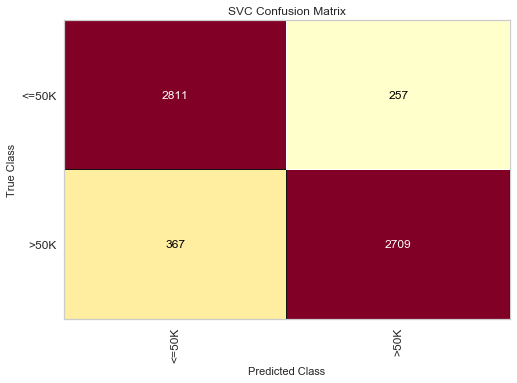

In [67]:
from yellowbrick.classifier import ConfusionMatrix
visualizer = ConfusionMatrix(svm, classes=['<=50K','>50K'])

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.poof();

In [57]:
print(svm.score(X_train, y_train))
print(svm.score(X_val, y_val))

0.8482391482391483
0.8513513513513513


In [58]:
test_scaled = scaler.fit_transform(test_i)
test['Y'] = svm.predict(test_scaled)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [60]:
test[['id', 'Y']].to_csv('./submit14.csv', header=False, index=False)